# Image Classification: Handwritten Digits

We will use TensorFlow and Keras to create a machine learning model to classify images.

We will perform the task as follows:

1. Load a prebuilt dataset.
2. Build a neural network machine learning model that classifies images.
3. Train this neural network.
4. Evaluate the accuracy of the model.

## MNIST Dataset

The MNIST dataset, or Modified National Institute of Standards and Technology dataset, is a widely-used collection of handwritten digits designed for training and testing image classification systems.

It includes 60,000 training images and 10,000 testing images, all of which are grayscale and 28×28 pixels in size.

The dataset's importance lies in its role as a standard benchmark for evaluating image classification algorithms, helping researchers and engineers to compare methods and track progress in the field.

The following figure shows a sample from the MNIST dataset:

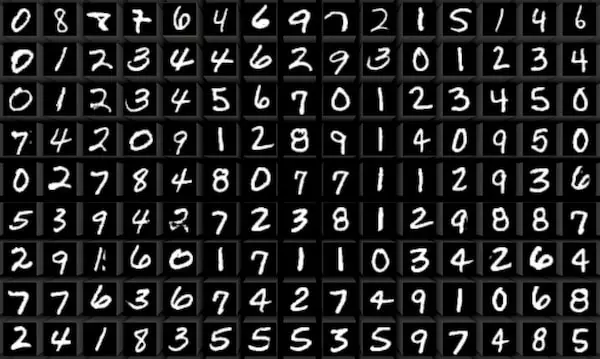

## Set up TensorFlow

Import TensorFlow:

In [1]:
# import TensorFlow
import tensorflow as tf

## Load a dataset

Load and prepare the MNIST dataset.

The pixel values of the images range from 0 through 255.

Scale these values to a range of 0 to 1 by dividing the values by 255.0.

This also converts the sample data from integers to floating-point numbers:

In [2]:
# load dataset
mnist = tf.keras.datasets.mnist

# set train data and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Flatten the data

Initial shapes of train data and test data:

In [3]:
# initial shapes of train data and test data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We use the **`reshape`** method to flatten the train data and the test data:

In [4]:
# flatten train data and test data
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Build a Machine Learning Model

We build a **`tf.keras.Sequential`** model that uses the **`Input`**, **`Dense`**, and **`Dropout`** layers.

We use the **`keras.Input()`** function to define the input layer of a model. This creates a Keras Input tensor, which serves as the starting point for building a graph of layers.

The last layer contains 10 neurons: one for each label (digit) from 0 to 9.

* **`Dense`** layer: represents a fully connected (or dense) layer, where every neuron in the layer is connected to every neuron in the previous layer. This layer is essential for building deep learning models, as it is used to learn complex patterns and relationships in data.
* **`Dropout`** layer: randomly sets input units to 0 with a frequency at each step during training time, the frequency value is set in the `rate` argument passed to the class on instanciation.
    * `rate`: Float between 0 and 1. Fraction of the input units to drop.

In [5]:
# build a model
model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

### Logits

The model returns a vector of logits, one for each class.

The vector of logits is composed of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function.

If the model is solving a multi-class classification problem, logits typically become an input to the softmax function.

The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In the following code, we generate a vector of logits:

In [6]:
# generate a vector of logits
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.10592213, -0.08172925,  0.45822924, -0.6663475 , -0.06923594,
        -0.11579417,  0.00197131,  0.6766601 , -0.18289346, -0.03024688]],
      dtype=float32)

We use the **`tf.nn.softmax`** function to convert these logits to probabilities for each class:

In [7]:
# convert logits to probabilities
tf.nn.softmax(predictions).numpy()

array([[0.10366597, 0.0859291 , 0.14744881, 0.04788989, 0.08700938,
        0.08305123, 0.093431  , 0.18344446, 0.0776614 , 0.09046879]],
      dtype=float32)

### Define a loss function

We define a loss function for training using the loss function in Keras:<br>
**`losses.SparseCategoricalCrossentropy`**

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example.

This loss is equal to the negative log probability of the true class: the loss is zero if the model is sure of the correct class.

In [9]:
# define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to:<br>
`-tf.math.log(1/10) ~= 2.3`.

In [10]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.4882977)

### Compile the Model

Before we start training, we configure and compile the model using **`Keras Model.compile`**.

We set the optimizer class to **`adam`**, set the loss to the **`loss_fn`** function we defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.



In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train the Model

We use the **`Model.fit`** method to train the model: adjust the model parameters and minimize the loss:

In [12]:
# train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8614 - loss: 0.4791
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9548 - loss: 0.1566
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1076
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9731 - loss: 0.0865
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9766 - loss: 0.0732


**Note:** 1875 = 60000 / 32.<br>
The model process the data by batches, each batch consists of 32 samples.

## Evaluate the Model

The **`Model.evaluate`** method checks the model's performance, usually on a validation set or test set.

In [13]:
# evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9773 - loss: 0.0756


[0.07555202394723892, 0.9772999882698059]

The image classifier is now trained to ~98% accuracy on this dataset.